# Detecting chlorosis of cyanobacteria

To assess the chlorosis of cyanobacterium *S.elongatus* PCC 7942 in 96-well plate more efficiently, here we import a selection of labeled data with a variety of possible predictors to generate the training set and validation set:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#import data
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NN-training-test-set.csv")

Mounted at /content/drive


In [ ]:
data.head(10)

,reader.terminal.OD730,reader.intermediate.OD730,reader.initial.OD730,reader.terminal.OD630,reader.intermediate.OD630,reader.initial.OD630,Sucrose.Productivity,Date,nRow.on.plate,nCol.on.plate,...,intermediate.OD730,initial.OD730,terminal.OD630,intermediate.OD630,initial.OD630,Sucrose.Specific.Productivity,r1.730,r1.630,r2.730,r2.630
0,0.1681,0.0830,0.0666,0.2084,0.1212,0.0490,33.845638,20220217,1,1,...,0.154848,0.135966,0.329732,0.202407,0.116730,126.457291,0.004335,0.022934,0.022801,0.020333
1,0.2037,0.0724,0.0461,0.3306,0.1022,0.0546,25.918667,20220217,2,1,...,0.142538,0.113662,0.552068,0.178126,0.122735,80.441793,0.007546,0.015519,0.033982,0.047133
2,0.2155,0.0753,0.0449,0.3657,0.1096,0.0489,24.477399,20220217,3,1,...,0.145868,0.112401,0.625404,0.187435,0.116624,71.729085,0.008687,0.019770,0.035413,0.050207
3,0.2466,0.0895,0.0491,0.4217,0.1327,0.0561,36.247751,20220217,4,1,...,0.162587,0.116836,0.751160,0.217705,0.124362,92.062671,0.011015,0.023331,0.036852,0.051603
4,0.2109,0.0782,0.0605,0.3518,0.1091,0.0734,23.156237,20220217,5,1,...,0.149226,0.129179,0.595856,0.186800,0.143683,69.378415,0.004809,0.010935,0.033541,0.048332
5,0.2551,0.0913,0.0486,0.4380,0.1375,0.0632,28.921308,20220217,6,1,...,0.164755,0.116305,0.789786,0.224224,0.132167,70.772746,0.011608,0.022024,0.037850,0.052463
6,0.1872,0.0988,0.0489,0.2127,0.1557,0.0585,29.521836,20220217,7,1,...,0.173911,0.116624,0.336686,0.249662,0.126981,99.609401,0.013320,0.028170,0.022212,0.012460
7,0.1974,0.0885,0.0483,0.2347,0.1291,0.0544,24.237188,20220217,8,1,...,0.161387,0.115987,0.373256,0.212867,0.122519,77.625539,0.011011,0.023017,0.027498,0.023400
8,0.2036,0.0943,0.0635,0.2727,0.1383,0.0619,31.923948,20220217,1,2,...,0.168395,0.132501,0.440334,0.225318,0.130725,99.128952,0.007991,0.022684,0.027016,0.027917
9,0.1970,0.0850,0.0845,0.3186,0.1240,0.0703,28.560991,20220217,2,2,...,0.157214,0.156621,0.527966,0.206090,0.140146,91.658089,0.000126,0.016068,0.028505,0.039197


Normalize dataset before proceeding:

In [3]:
# Select all columns except the ones you want to exclude
columns_to_normalize = data.columns.difference(['Bleached'])

# Assuming 'data' is your dataset in the form of a pandas DataFrame
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Convert back to DataFrame (if needed)
normalized_data = pd.DataFrame(data, columns=data.columns)

In [ ]:
normalized_data.head(5)

,reader.terminal.OD730,reader.intermediate.OD730,reader.initial.OD730,reader.terminal.OD630,reader.intermediate.OD630,reader.initial.OD630,Sucrose.Productivity,Date,nRow.on.plate,nCol.on.plate,...,intermediate.OD730,initial.OD730,terminal.OD630,intermediate.OD630,initial.OD630,Sucrose.Specific.Productivity,r1.730,r1.630,r2.730,r2.630
0,-0.099524,0.280974,1.582655,-0.724080,0.330276,-0.835000,1.490098,-1.282637,-1.529790,-1.595947,...,0.254337,1.548145,-0.742123,0.284333,-0.808310,1.710426,-0.812275,1.001478,-0.305879,-0.901323
1,0.915687,-0.353118,-0.648234,1.176927,-0.277256,-0.399083,0.574570,-1.282637,-1.093147,-1.595947,...,-0.369000,-0.633581,1.182439,-0.306981,-0.399736,0.166067,0.101671,-0.031760,1.359118,1.223120
2,1.252190,-0.179640,-0.778823,1.722961,-0.040638,-0.842785,0.408110,-1.282637,-0.656504,-1.595947,...,-0.200405,-0.756922,1.817240,-0.080266,-0.815540,-0.126347,0.426524,0.560591,1.572150,1.466827
3,2.139074,0.669804,-0.321763,2.594126,0.697993,-0.282320,1.767531,-1.282637,-0.219862,-1.595947,...,0.646229,-0.323116,2.905799,0.656890,-0.289053,0.556083,1.088803,1.056790,1.786471,1.577529
4,1.121011,-0.006162,0.918830,1.506725,-0.056626,1.064354,0.255522,-1.282637,0.216781,-1.595947,...,-0.030348,0.884205,1.561475,-0.095729,1.025457,-0.205240,-0.677298,-0.670615,1.293405,1.318176


In [ ]:
normalized_data[['Bleached']].head(5)

,Bleached
0,1
1,0
2,0
3,0
4,0


### Model#0: Logistic classifier: using OD730, OD630, sucrose productivity, and growth rate calculated based on OD730 and OD630:

Isolate predictors and response from the original dataset:
Split the whole dataset into training set (80%) and test set (20%) for cross validation.

In [ ]:
#Split the whole dataset into training set (80%) and test set (20%) for cross validation.
train_set = normalized_data.sample(frac=0.8, random_state=19940212)
valid_set = normalized_data.drop(train_set.index)
print(train_set.shape, valid_set.shape, normalized_data.shape)

#Extract explanatory variables and response variable, convert to numpy and confirm shapes
train_X = train_set[['reader.terminal.OD730','reader.terminal.OD630']].to_numpy()
valid_X = valid_set[['reader.terminal.OD730','reader.terminal.OD630']].to_numpy()
print(train_X.shape, valid_X.shape)

train_y = train_set['Sucrose.Productivity'].to_numpy()
valid_y = valid_set['Sucrose.Productivity'].to_numpy()
print(train_y.shape, valid_y.shape)

#Package into tensorflow.Dataset objects and batch
train_data = tf.data.Dataset.from_tensor_slices((train_X,train_y)).batch(10)
valid_data = tf.data.Dataset.from_tensor_slices((valid_X,valid_y)).batch(10)

(3062, 24) (765, 24) (3827, 24)
(3062, 2) (765, 2)
(3062,) (765,)


Build the model with one input layer followed by sigmoid function.

In [ ]:
# Create lists to store loss and accuracy values
loss_values = []
binary_accuracy = []
val_loss_values = []
val_binary_accuracy_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        binary_accuracy.append(logs['binary_accuracy'])
        val_loss_values.append(logs['val_loss'])
        val_binary_accuracy_values.append(logs['val_binary_accuracy'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)
# create and summarize linear model neural network
model0 = tf.keras.models.Sequential()
model0.add(tf.keras.layers.Dense(units=1, input_shape=[2], activation=tf.keras.activations.sigmoid))
model0.summary()
# compile model with loss function and optimizer
model0.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model0.summary()
# batch data and train model
model0.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.8168 - loss: 0.5242 - val_binary_accuracy: 0.8954 - val_loss: 0.4444
Epoch 2/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9095 - loss: 0.4072 - val_binary_accuracy: 0.9137 - val_loss: 0.3773
Epoch 3/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9024 - loss: 0.3615 - val_binary_accuracy: 0.9085 - val_loss: 0.3423
Epoch 4/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9076 - loss: 0.3329 - val_binary_accuracy: 0.9176 - val_loss: 0.3176
Epoch 5/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9157 - loss: 0.3111 - val_binary_accuracy: 0.9268 - val_loss: 0.2980
Epoch 6/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9236 - loss: 0.2932 - val_binary_accuracy: 0.9294 - val_loss: 0.2817
Epoch 7/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9288 - loss: 0.2781 - val_binary_accuracy: 0.9386 - val_loss: 0.2679
Epoch 8/5000
307/307 - 1s - 4ms/step - binary_accuracy: 0.9337 - loss: 0.2652 - val_binary_accuracy: 0.9412 - v

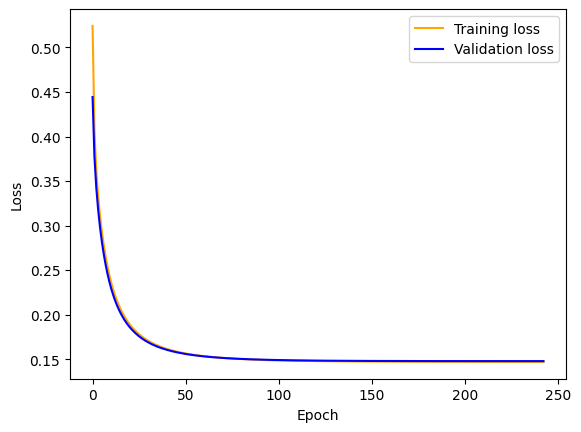

In [ ]:
#Plot the loss decrease with respect to epoch
plt.plot(loss_values,color = "orange" )
plt.plot(val_loss_values,color = "blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()

Form above we can see that the logistic classifier reached max accuracy of 93.07%.

### Model#1: regression of sucrose productivity based on terminal OD730, terminal OD630 Sucrose.Productivity, r2.730, r2.630.

To see if any factors contribute to sucrose productivity, varibales relevant to growth were introduced here as predictors.

In [4]:
#Split the whole dataset into training set (80%) and test set (20%) for cross validation.
train_set = data.sample(frac=0.8, random_state=19940212)
valid_set = data.drop(train_set.index)
print(train_set.shape, valid_set.shape, data.shape)

#Extract explanatory variables and response variable, convert to numpy and confirm shapes
train_X = train_set[['reader.terminal.OD730','reader.terminal.OD630','Bleached','r2.730','r2.630']].to_numpy()
valid_X = valid_set[['reader.terminal.OD730','reader.terminal.OD630','Bleached','r2.730','r2.630']].to_numpy()
print(train_X.shape, valid_X.shape)

train_y = train_set['Sucrose.Productivity'].to_numpy()
valid_y = valid_set['Sucrose.Productivity'].to_numpy()
print(train_y.shape, valid_y.shape)

#Package into tensorflow.Dataset objects and batch
train_data = tf.data.Dataset.from_tensor_slices((train_X,train_y)).batch(10)
valid_data = tf.data.Dataset.from_tensor_slices((valid_X,valid_y)).batch(10)

(3062, 24) (765, 24) (3827, 24)
(3062, 5) (765, 5)
(3062,) (765,)


In [7]:
# Create lists to store loss and accuracy values
loss_values = []
val_loss_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        val_loss_values.append(logs['val_loss'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units=1, input_shape=[5]))
model1.summary()
# compile model with loss function and optimizer
model1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model1.summary()
# batch data and train model
model1.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 3ms/step - loss: 0.7025 - val_loss: 0.5856
Epoch 2/5000
307/307 - 1s - 4ms/step - loss: 0.6558 - val_loss: 0.5843
Epoch 3/5000
307/307 - 1s - 2ms/step - loss: 0.6557 - val_loss: 0.5840
Epoch 4/5000
307/307 - 1s - 2ms/step - loss: 0.6557 - val_loss: 0.5840
Epoch 5/5000
307/307 - 0s - 1ms/step - loss: 0.6557 - val_loss: 0.5840
Epoch 6/5000
307/307 - 0s - 1ms/step - loss: 0.6557 - val_loss: 0.5840
Epoch 7/5000
307/307 - 0s - 1ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 8/5000
307/307 - 0s - 1ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 9/5000
307/307 - 1s - 2ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 10/5000
307/307 - 0s - 1ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 11/5000
307/307 - 1s - 2ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 12/5000
307/307 - 1s - 2ms/step - loss: 0.6556 - val_loss: 0.5840
Epoch 13/5000
307/307 - 1s - 2ms/step - loss: 0.6555 - val_loss: 0.5840
Epoch 14/5000
307/307 - 1s - 2ms/step - loss: 0.6555 - val_loss: 0.5840
E

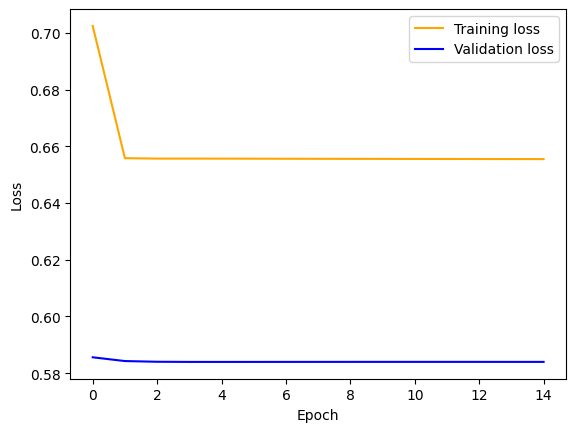

In [8]:
#Plot the loss decrease with respect to epoch
plt.plot(loss_values,color = "orange" )
plt.plot(val_loss_values,color = "blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()

In [9]:
weights0 = model1.layers[0].get_weights()[0]
weights1 = model1.layers[0].get_weights()[1]
print(weights0, weights1)

[[ 0.26334605]
 [ 0.17929167]
 [ 0.1679441 ]
 [ 0.42195594]
 [-0.56315637]] [-0.00275311]


Model 2: add sigmoid as activation function.

In [10]:
# Create lists to store loss and accuracy values
loss_values = []
val_loss_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        val_loss_values.append(logs['val_loss'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=1, input_shape=[5], activation=tf.keras.activations.sigmoid))
model2.summary()
# compile model with loss function and optimizer
model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model2.summary()
# batch data and train model
model2.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Streaming output truncated to the last 5000 lines.
Epoch 665/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 666/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 667/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 668/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 669/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 670/5000
307/307 - 0s - 1ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 671/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 672/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 673/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 674/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 675/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 676/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920
Epoch 677/5000
307/307 - 1s - 2ms/step - loss: 0.8571 - val_loss: 0.7920


In [11]:
# Create lists to store loss and accuracy values
loss_values = []
val_loss_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        val_loss_values.append(logs['val_loss'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units=1, input_shape=[5], activation=tf.keras.activations.relu))
model3.summary()
# compile model with loss function and optimizer
model3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model3.summary()
# batch data and train model
model3.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 2ms/step - loss: 0.9604 - val_loss: 0.8657
Epoch 2/5000
307/307 - 1s - 2ms/step - loss: 0.9049 - val_loss: 0.8352
Epoch 3/5000
307/307 - 0s - 1ms/step - loss: 0.8900 - val_loss: 0.8209
Epoch 4/5000
307/307 - 0s - 1ms/step - loss: 0.8819 - val_loss: 0.8085
Epoch 5/5000
307/307 - 0s - 1ms/step - loss: 0.8728 - val_loss: 0.7989
Epoch 6/5000
307/307 - 0s - 1ms/step - loss: 0.8665 - val_loss: 0.7956
Epoch 7/5000
307/307 - 1s - 2ms/step - loss: 0.8634 - val_loss: 0.7934
Epoch 8/5000
307/307 - 0s - 1ms/step - loss: 0.8616 - val_loss: 0.7922
Epoch 9/5000
307/307 - 0s - 1ms/step - loss: 0.8608 - val_loss: 0.7916
Epoch 10/5000
307/307 - 0s - 1ms/step - loss: 0.8602 - val_loss: 0.7911
Epoch 11/5000
307/307 - 1s - 2ms/step - loss: 0.8597 - val_loss: 0.7908
Epoch 12/5000
307/307 - 1s - 2ms/step - loss: 0.8595 - val_loss: 0.7906
Epoch 13/5000
307/307 - 1s - 2ms/step - loss: 0.8593 - val_loss: 0.7903
Epoch 14/5000
307/307 - 0s - 1ms/step - loss: 0.8591 - val_loss: 0.7901
E

Try deleting chlorosis variable and see if it affects prediction loss

In [12]:
#Split the whole dataset into training set (80%) and test set (20%) for cross validation.
train_set = data.sample(frac=0.8, random_state=19940212)
valid_set = data.drop(train_set.index)
print(train_set.shape, valid_set.shape, data.shape)

#Extract explanatory variables and response variable, convert to numpy and confirm shapes
train_X = train_set[['reader.terminal.OD730','reader.terminal.OD630','r2.730','r2.630']].to_numpy()
valid_X = valid_set[['reader.terminal.OD730','reader.terminal.OD630','r2.730','r2.630']].to_numpy()
print(train_X.shape, valid_X.shape)

train_y = train_set['Bleached'].to_numpy()
valid_y = valid_set['Bleached'].to_numpy()
print(train_y.shape, valid_y.shape)

#Package into tensorflow.Dataset objects and batch
train_data = tf.data.Dataset.from_tensor_slices((train_X,train_y)).batch(10)
valid_data = tf.data.Dataset.from_tensor_slices((valid_X,valid_y)).batch(10)

# Create lists to store loss and accuracy values
loss_values = []
val_loss_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        val_loss_values.append(logs['val_loss'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(units=1, input_shape=[4]))
model4.summary()
# compile model with loss function and optimizer
model4.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model4.summary()
# batch data and train model
model4.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

(3062, 24) (765, 24) (3827, 24)
(3062, 4) (765, 4)
(3062,) (765,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 2s - 8ms/step - loss: 0.1595 - val_loss: 0.0583
Epoch 2/5000
307/307 - 1s - 2ms/step - loss: 0.0522 - val_loss: 0.0454
Epoch 3/5000
307/307 - 1s - 2ms/step - loss: 0.0447 - val_loss: 0.0440
Epoch 4/5000
307/307 - 1s - 2ms/step - loss: 0.0434 - val_loss: 0.0440
Epoch 5/5000
307/307 - 1s - 2ms/step - loss: 0.0432 - val_loss: 0.0441
Epoch 6/5000
307/307 - 1s - 2ms/step - loss: 0.0432 - val_loss: 0.0441
Epoch 7/5000
307/307 - 1s - 2ms/step - loss: 0.0431 - val_loss: 0.0442
Epoch 8/5000
307/307 - 1s - 2ms/step - loss: 0.0431 - val_loss: 0.0442
Epoch 9/5000
307/307 - 1s - 2ms/step - loss: 0.0431 - val_loss: 0.0442
Epoch 10/5000
307/307 - 0s - 1ms/step - loss: 0.0431 - val_loss: 0.0442
Epoch 11/5000
307/307 - 0s - 1ms/step - loss: 0.0431 - val_loss: 0.0441
Epoch 12/5000
307/307 - 1s - 2ms/step - loss: 0.0431 - val_loss: 0.0441
Epoch 13/5000
307/307 - 0s - 1ms/step - loss: 0.0431 - val_loss: 0.0441


It seems sucrose productivity doesn't contribute much to the prediction. To valdidate the role of that predictor, we remove it from the original model and run it again to compare the prediction accuracy.

In [ ]:


# Create lists to store loss and accuracy values
loss_values = []
binary_accuracy = []
val_loss_values = []
val_binary_accuracy_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        binary_accuracy.append(logs['binary_accuracy'])
        val_loss_values.append(logs['val_loss'])
        val_binary_accuracy_values.append(logs['val_binary_accuracy'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=1, input_shape=[4], activation=tf.keras.activations.sigmoid))
model2.summary()
# compile model with loss function and optimizer
model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model2.summary()
# batch data and train model
model2.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

weights0 = model2.layers[0].get_weights()[0]
weights1 = model2.layers[0].get_weights()[1]
print(weights0, weights1)

(3062, 24) (765, 24) (3827, 24)
(3062, 4) (765, 4)
(3062,) (765,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 5ms/step - binary_accuracy: 0.8129 - loss: 0.5197 - val_binary_accuracy: 0.8745 - val_loss: 0.4312
Epoch 2/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.8877 - loss: 0.3907 - val_binary_accuracy: 0.9020 - val_loss: 0.3438
Epoch 3/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.9024 - loss: 0.3301 - val_binary_accuracy: 0.9150 - val_loss: 0.2966
Epoch 4/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.9092 - loss: 0.2942 - val_binary_accuracy: 0.9203 - val_loss: 0.2667
Epoch 5/5000
307/307 - 1s - 4ms/step - binary_accuracy: 0.9167 - loss: 0.2700 - val_binary_accuracy: 0.9203 - val_loss: 0.2459
Epoch 6/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.9216 - loss: 0.2522 - val_binary_accuracy: 0.9242 - val_loss: 0.2304
Epoch 7/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9275 - loss: 0.2385 - val_binary_accuracy: 0.9294 - val_loss: 0.2185
Epoch 8/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9321 - loss: 0.2276 - val_binary_accuracy: 0.9333 - v

The accuracy does not change at all! This proves sucrose productivity does not associate with the chlorosis, indicating sucrose productivity not being affected. Another predictor we are interested is the growth rate represented by the division of two measured OD730. To verify its role, we remove it from the model to see if prediction accuracy is affected.

In [ ]:
#Split the whole dataset into training set (80%) and test set (20%) for cross validation.
train_set = data.sample(frac=0.8, random_state=19940212)
valid_set = data.drop(train_set.index)
print(train_set.shape, valid_set.shape, data.shape)

#Extract explanatory variables and response variable, convert to numpy and confirm shapes
train_X = train_set[['reader.terminal.OD730','reader.terminal.OD630','r2.630']].to_numpy()
valid_X = valid_set[['reader.terminal.OD730','reader.terminal.OD630','r2.630']].to_numpy()
print(train_X.shape, valid_X.shape)

train_y = train_set['Bleached'].to_numpy()
valid_y = valid_set['Bleached'].to_numpy()
print(train_y.shape, valid_y.shape)

#Package into tensorflow.Dataset objects and batch
train_data = tf.data.Dataset.from_tensor_slices((train_X,train_y)).batch(10)
valid_data = tf.data.Dataset.from_tensor_slices((valid_X,valid_y)).batch(10)

# Create lists to store loss and accuracy values
loss_values = []
binary_accuracy = []
val_loss_values = []
val_binary_accuracy_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        binary_accuracy.append(logs['binary_accuracy'])
        val_loss_values.append(logs['val_loss'])
        val_binary_accuracy_values.append(logs['val_binary_accuracy'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units=1, input_shape=[3], activation=tf.keras.activations.sigmoid))
model3.summary()
# compile model with loss function and optimizer
model3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model3.summary()
# batch data and train model
model3.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

weights0 = model3.layers[0].get_weights()[0]
weights1 = model3.layers[0].get_weights()[1]
print(weights0, weights1)

(3062, 24) (765, 24) (3827, 24)
(3062, 3) (765, 3)
(3062,) (765,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 4ms/step - binary_accuracy: 0.7701 - loss: 0.5740 - val_binary_accuracy: 0.8405 - val_loss: 0.4472
Epoch 2/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.8863 - loss: 0.3808 - val_binary_accuracy: 0.9111 - val_loss: 0.3316
Epoch 3/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9141 - loss: 0.3115 - val_binary_accuracy: 0.9229 - val_loss: 0.2827
Epoch 4/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9219 - loss: 0.2775 - val_binary_accuracy: 0.9268 - val_loss: 0.2551
Epoch 5/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9239 - loss: 0.2571 - val_binary_accuracy: 0.9294 - val_loss: 0.2374
Epoch 6/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9272 - loss: 0.2434 - val_binary_accuracy: 0.9320 - val_loss: 0.2251
Epoch 7/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9301 - loss: 0.2336 - val_binary_accuracy: 0.9320 - val_loss: 0.2161
Epoch 8/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9308 - loss: 0.2264 - val_binary_accuracy: 0.9320 - v

The prediction accuracy is slightly lower! This indicates that the growth rate represented by OD730 explain some variations for chlorosis but not a lot. Plus, there is a high correlation between OD730,54h and growth rate after salt induction, indicating that terminal OD730 represents better biomass accumulation, a proxy we selected earlier for better photosynthesis performance. To see if r2.730 has colinearity with other variables, we generate a correlation matrix to look for possible colinearity.

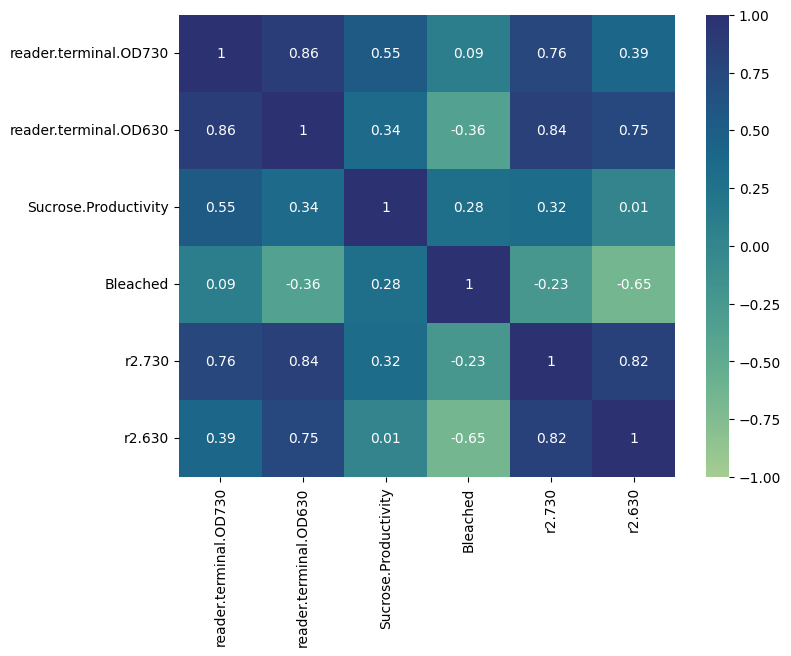

In [ ]:
import seaborn as sns
# Compute the correlation matrix
selected_data = data[['reader.terminal.OD730', 'reader.terminal.OD630', 'Sucrose.Productivity', 'Bleached', 'r2.730', 'r2.630']]

corr_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('')
plt.savefig("chlorosis-correlation.pdf",format='pdf', bbox_inches='tight')
plt.show()

It seems like the correlation between chlorisis ('Bleached') and sucrose productivity ('Sucrose.Productivity') is quite weak, indicating that sucrose productivity is not affected. Furthermore, same observation was obtained between chlorosis and growth represented by OD730, indicating little association between these two phenotypes as well.

### Model#2: Logistic classifier: using OD730 and OD630, and OD630/OD730 as predictors, and sigmoid as activation function.

(3062, 25) (765, 25) (3827, 25)
(3062, 3) (765, 3)
(3062,) (765,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.8779 - loss: 0.5351 - val_binary_accuracy: 0.9124 - val_loss: 0.4527
Epoch 2/5000
307/307 - 1s - 3ms/step - binary_accuracy: 0.8707 - loss: 0.4368 - val_binary_accuracy: 0.8706 - val_loss: 0.3901
Epoch 3/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.8462 - loss: 0.3892 - val_binary_accuracy: 0.8771 - val_loss: 0.3535
Epoch 4/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.8703 - loss: 0.3572 - val_binary_accuracy: 0.8915 - val_loss: 0.3269
Epoch 5/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.8961 - loss: 0.3324 - val_binary_accuracy: 0.9085 - val_loss: 0.3058
Epoch 6/5000
307/307 - 1s - 2ms/step - binary_accuracy: 0.9131 - loss: 0.3118 - val_binary_accuracy: 0.9229 - val_loss: 0.2883
Epoch 7/5000
307/307 - 0s - 1ms/step - binary_accuracy: 0.9229 - loss: 0.2944 - val_binary_accuracy: 0.9320 - val_loss: 0.2735
Epoch 8/5000
307/307 - 0s - 2ms/step - binary_accuracy: 0.9288 - loss: 0.2794 - val_binary_accuracy: 0.9399 - v

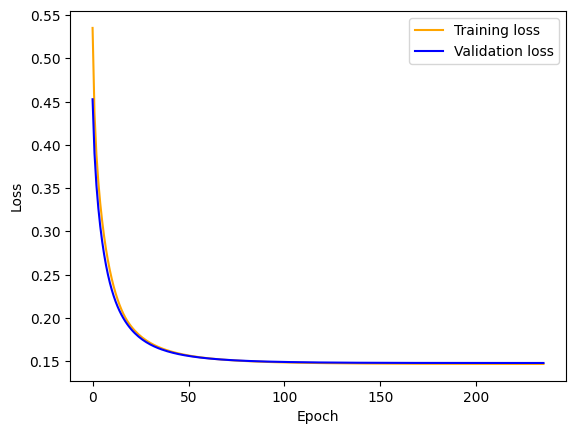

In [ ]:
#Split the whole dataset into training set (80%) and test set (20%) for cross validation.
data['division'] = data['reader.terminal.OD630']/data['reader.terminal.OD730']
# Select all columns except the ones you want to exclude
columns_to_normalize = data.columns.difference(['Bleached'])

# Assuming 'data' is your dataset in the form of a pandas DataFrame
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Convert back to DataFrame (if needed)
normalized_data = pd.DataFrame(data, columns=data.columns)

train_set = normalized_data.sample(frac=0.8, random_state=19940212)
valid_set = normalized_data.drop(train_set.index)
print(train_set.shape, valid_set.shape, normalized_data.shape)

#Extract explanatory variables and response variable, convert to numpy and confirm shapes
train_X = train_set[['reader.terminal.OD730','reader.terminal.OD630','division']].to_numpy()
valid_X = valid_set[['reader.terminal.OD730','reader.terminal.OD630','division']].to_numpy()
print(train_X.shape, valid_X.shape)

train_y = train_set['Bleached'].to_numpy()
valid_y = valid_set['Bleached'].to_numpy()
print(train_y.shape, valid_y.shape)

#Package into tensorflow.Dataset objects and batch
train_data = tf.data.Dataset.from_tensor_slices((train_X,train_y)).batch(10)
valid_data = tf.data.Dataset.from_tensor_slices((valid_X,valid_y)).batch(10)

# Create lists to store loss and accuracy values
loss_values = []
binary_accuracy = []
val_loss_values = []
val_binary_accuracy_values = []

# Define a custom callback to store loss and accuracy values and perform early stopping
class LossAccEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(LossAccEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs['loss'])
        binary_accuracy.append(logs['binary_accuracy'])
        val_loss_values.append(logs['val_loss'])
        val_binary_accuracy_values.append(logs['val_binary_accuracy'])

        val_loss = logs.get('val_loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.model.stop_training = True

# Define EarlyStopping callback
early_stopping = LossAccEarlyStopping(patience=10)

# create and summarize linear model neural network
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(units=1, input_shape=[3], activation=tf.keras.activations.sigmoid))
model4.summary()
# compile model with loss function and optimizer
model4.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model4.summary()
# batch data and train model
model4.fit(train_data, epochs=5000,validation_data=valid_data, callbacks=[early_stopping],verbose = 2)

#Plot the loss decrease with respect to epoch
plt.plot(loss_values,color = "orange" )
plt.plot(val_loss_values,color = "blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()

In [ ]:
weights0 = model2.layers[0].get_weights()[0]
weights1 = model2.layers[0].get_weights()[1]
print(weights0, weights1)

[[ 12.634049]
 [  7.385689]
 [-17.118683]] [18.489122]


Apprarently the new predictor contributed to a higher accuracy. However, we are not sure if adding more hidden layer leads to higher accuracy. To compare, we will introduce a feed-forward neural network with a hidden layer to create a non-linear boundary.